In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy
from scipy import stats

# Supply Chain Optimization through Advanced Data Analysis

Objective:To analyze and improve operational efficiency in a supply chain by identifying patterns, relationships, and trends within key variables such as stock levels, product sales, lead times, revenue, and transportation modes. 

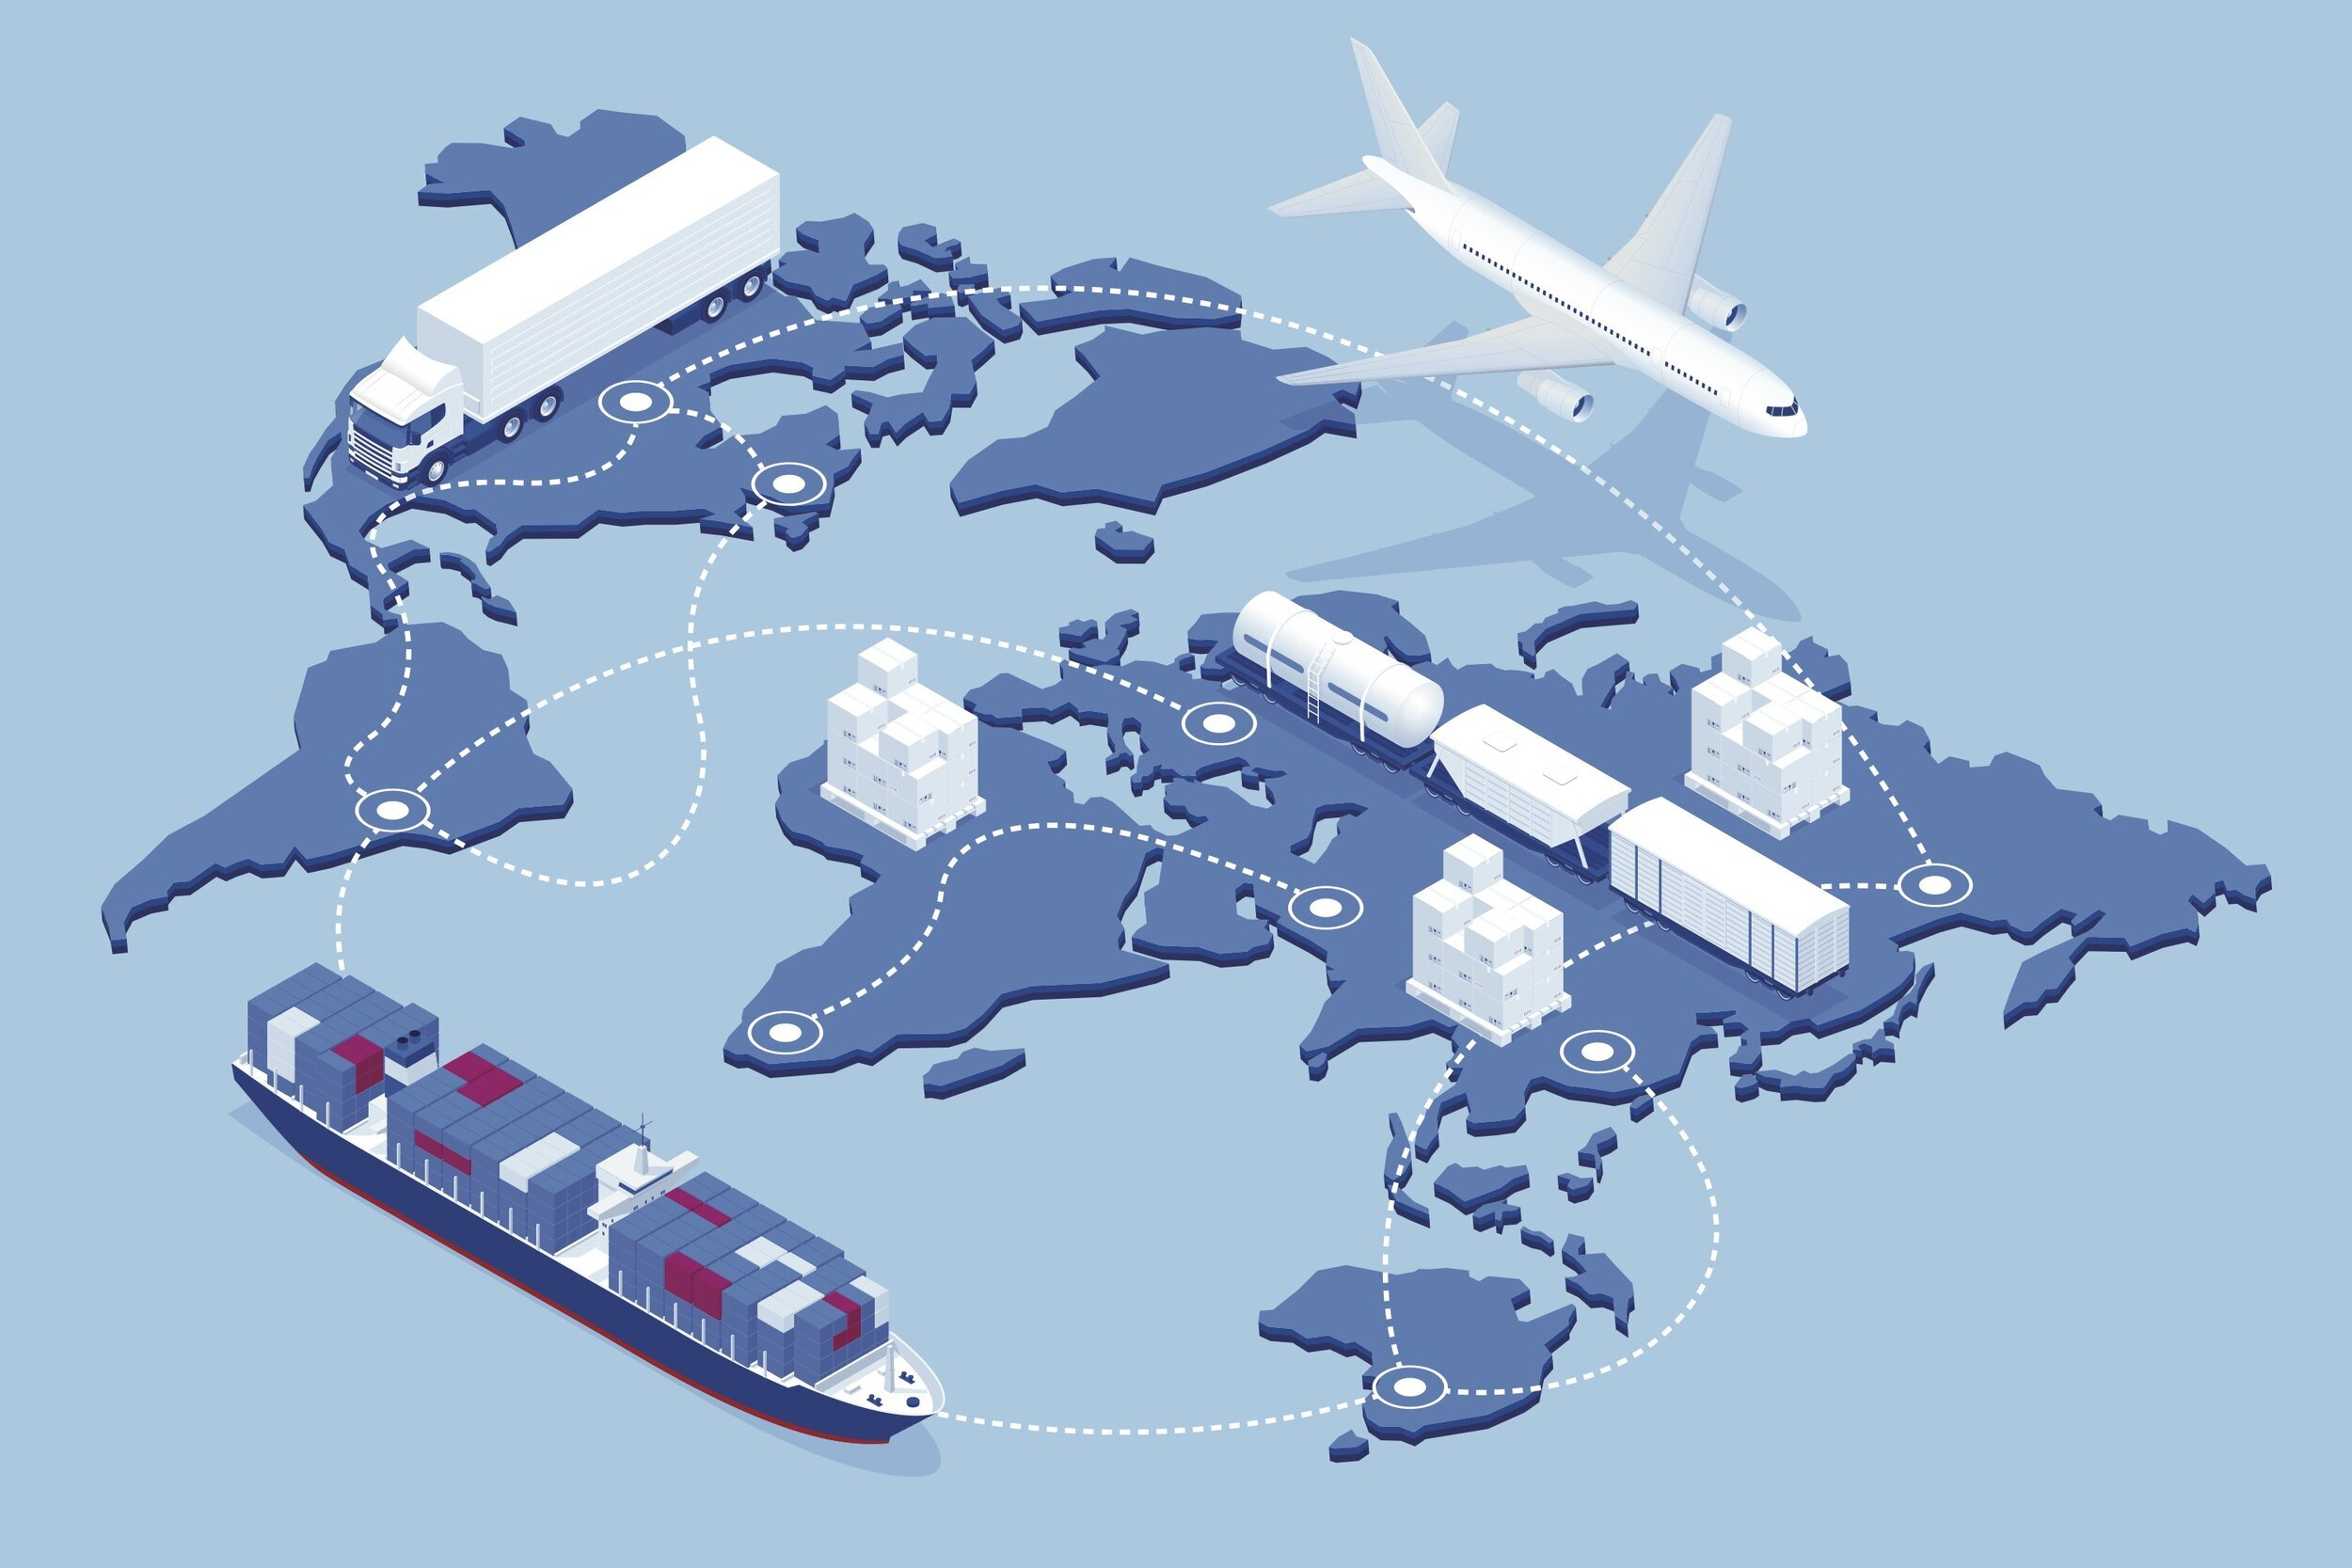

In [2]:
from IPython.display import Image, display
image_path = "Supply image.jpeg"
display(Image(filename=image_path,width=600, height=400))

# Exploring the data

In [3]:
sdata=pd.read_excel("C:\\Users\\megha\\OneDrive\\Desktop\\Practice\\Supply chain 2.xlsx")

In [4]:
sdata.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Transportation modes,Location
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,Road,Mumbai
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,Road,Mumbai
2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,Air,Mumbai
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,Rail,Kolkata
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,Air,Delhi


In [5]:
sdata.tail()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Transportation modes,Location
95,haircare,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,Air,Mumbai
96,cosmetics,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,Road,Mumbai
97,haircare,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,Road,Mumbai
98,skincare,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,Rail,Chennai
99,haircare,68.517833,17,627,9185.185829,Unknown,55,8,59,6,Carrier B,Rail,Chennai


In [6]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    object 
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    object 
 11  Transportation modes     100 non-null    object 
 12  Location                 100 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 10.3+ KB


In [7]:
sdata.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000


In [8]:
value_counts=sdata['Product type'].value_counts()

In [9]:
value_counts

Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

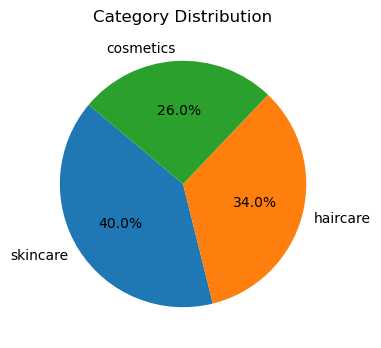

In [10]:
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.show()

In [11]:
value_counts2=sdata['Customer demographics'].value_counts()

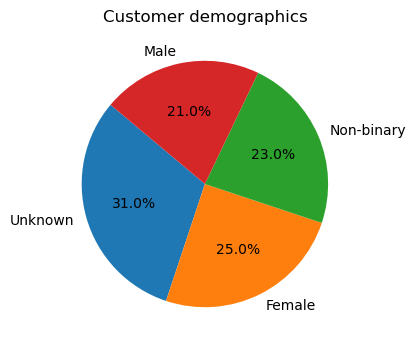

In [12]:
plt.figure(figsize=(4, 4))
plt.pie(value_counts2, labels=value_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer demographics')
plt.show()

In [13]:
value_counts3=sdata['Transportation modes'].value_counts()

In [14]:
value_counts3

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

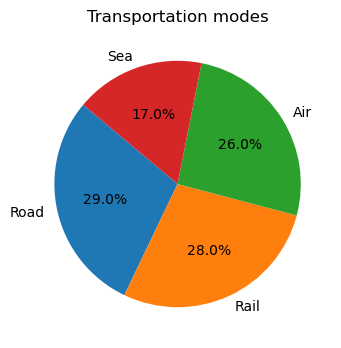

In [15]:
plt.figure(figsize=(4, 4))
plt.pie(value_counts3, labels=value_counts3.index, autopct='%1.1f%%', startangle=140)
plt.title('Transportation modes')
plt.show()

# Missing Value Analysis

In [16]:
print(sdata.isnull().sum())

Product type               0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Transportation modes       0
Location                   0
dtype: int64


There are no null values in the data.
If we have null values we can visualize them by using missingno module and treat them with mean and median.

# Outlier Detection

In [17]:
numerical_cols = ['Price', 'Availability', 'Number of products sold', 'Revenue generated',
                  'Stock levels', 'Lead times', 'Order quantities', 'Shipping times']

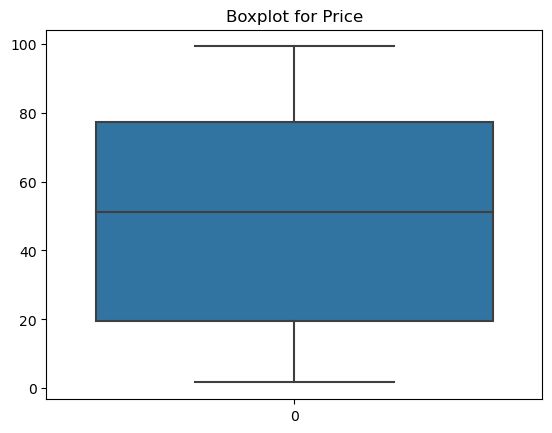

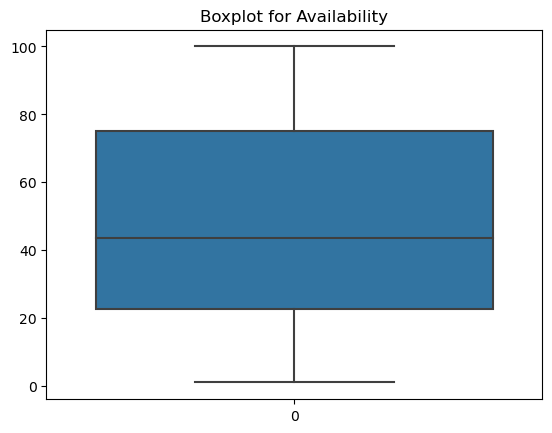

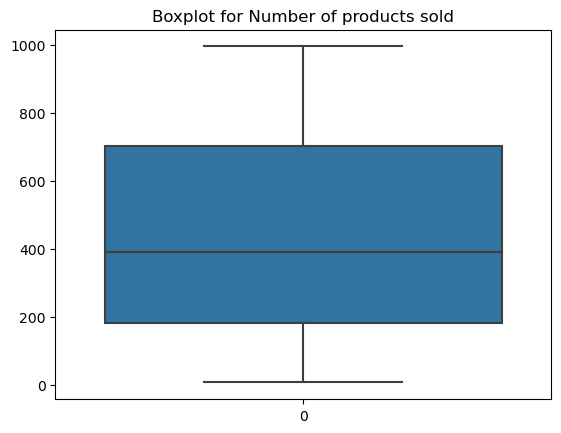

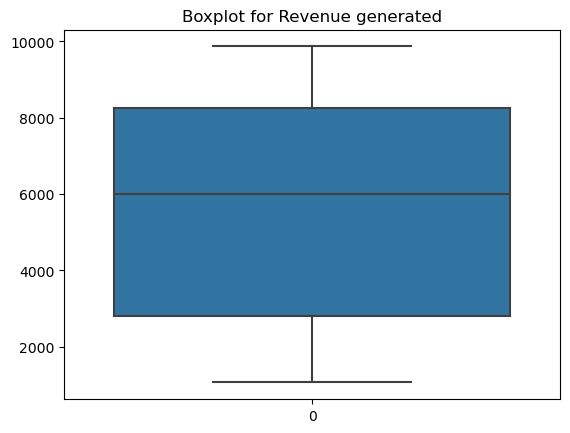

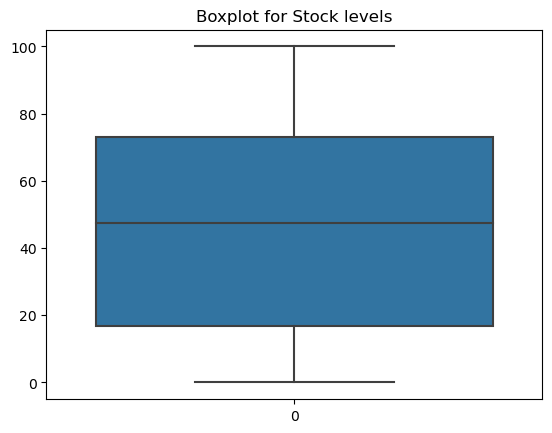

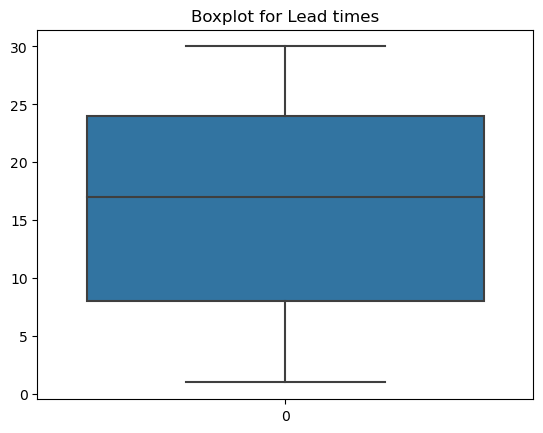

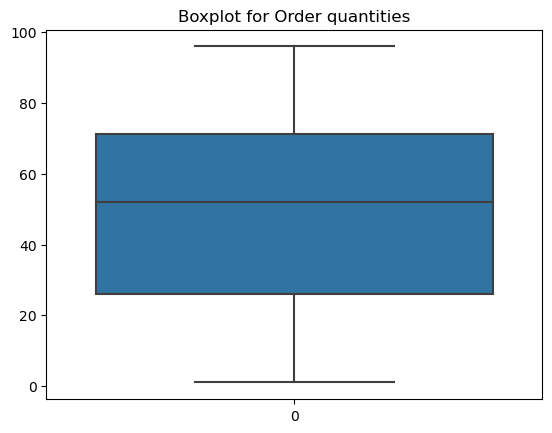

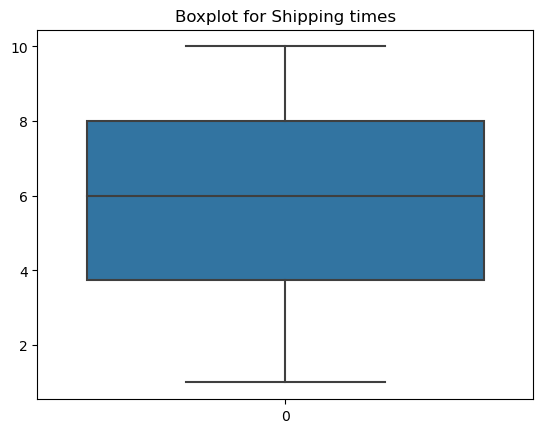

In [18]:
for col in numerical_cols:
    sns.boxplot(sdata[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

There are no outliers in the data.If there are we can treat them using Interquartile range

# Univariate Analysis

In [19]:
sdata.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Transportation modes,Location
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,Road,Mumbai
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,Road,Mumbai
2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,Air,Mumbai
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,Rail,Kolkata
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,Air,Delhi


In [20]:
Average_price=sdata['Price'].mean()

In [21]:
Average_price

49.462461344643685

In [22]:
Average_lead_times=sdata['Lead times'].mean()

In [23]:
Average_lead_times

15.96

The average lead time (time required to get the order from suppliers) 

<Axes: xlabel='Price', ylabel='Density'>

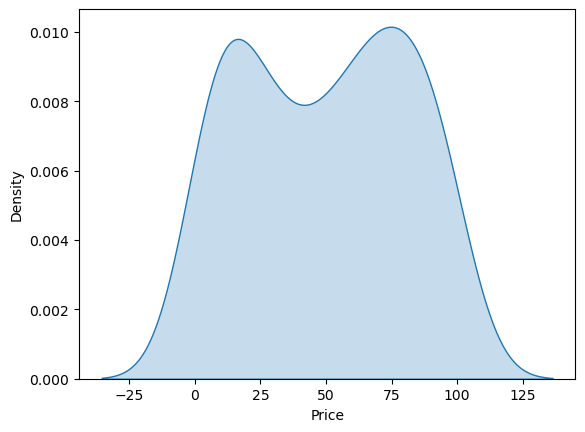

In [24]:
sns.kdeplot(sdata['Price'], fill=True)

In [25]:
sdata['Transportation modes'].mode()

0    Road
Name: Transportation modes, dtype: object

In [26]:
sdata['Shipping carriers'].mode()

0    Carrier B
Name: Shipping carriers, dtype: object

# Bivariate Analysis

 # Revenue over supply chain

In [27]:
sdata['Product_Revenue']=sdata['Price']*sdata['Number of products sold']

In [28]:
sdata.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Transportation modes,Location,Product_Revenue
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,Road,Mumbai,55986.020445
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,Road,Mumbai,10924.833130
2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,Air,Mumbai,90.557466
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,Rail,Kolkata,5076.557470
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,Air,Delhi,4185.587048


In [29]:
sdata.rename(columns={'Revenue generated': 'Supply Chain Revenue'}, inplace=True)

In [30]:
sdata.head()

,Product type,Price,Availability,Number of products sold,Supply Chain Revenue,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Transportation modes,Location,Product_Revenue
0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,Road,Mumbai,55986.020445
1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,Road,Mumbai,10924.833130
2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,Air,Mumbai,90.557466
3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,Rail,Kolkata,5076.557470
4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,Air,Delhi,4185.587048


In [31]:
sdata['Revenue per Product'] = sdata['Supply Chain Revenue'] / sdata['Number of products sold']

In [32]:
sdata['Revenue per Product']

0       10.800495
1       10.137092
2     1197.218703
3       93.576342
4        3.084392
         ...     
95      10.991613
96      23.760570
97      70.498655
98       9.338393
99      14.649419
Name: Revenue per Product, Length: 100, dtype: float64

In [33]:
sdata['Revenue per Product'].mean()

41.35631352118158

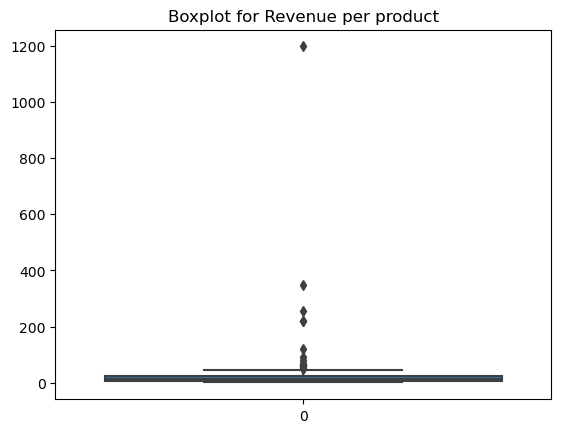

In [34]:
sns.boxplot(sdata['Revenue per Product'])
plt.title(f"Boxplot for Revenue per product")
plt.show()

The revenue per product is not evenly distributed for all the products over the supply chain.Now we will try to find out the product categories average revenue

In [35]:
average_revenue_per_product = sdata.groupby('Product type')['Revenue per Product'].mean().reset_index()
print(average_revenue_per_product)

  Product type  Revenue per Product
0    cosmetics            31.461863
1     haircare            73.334005
2     skincare            20.606668


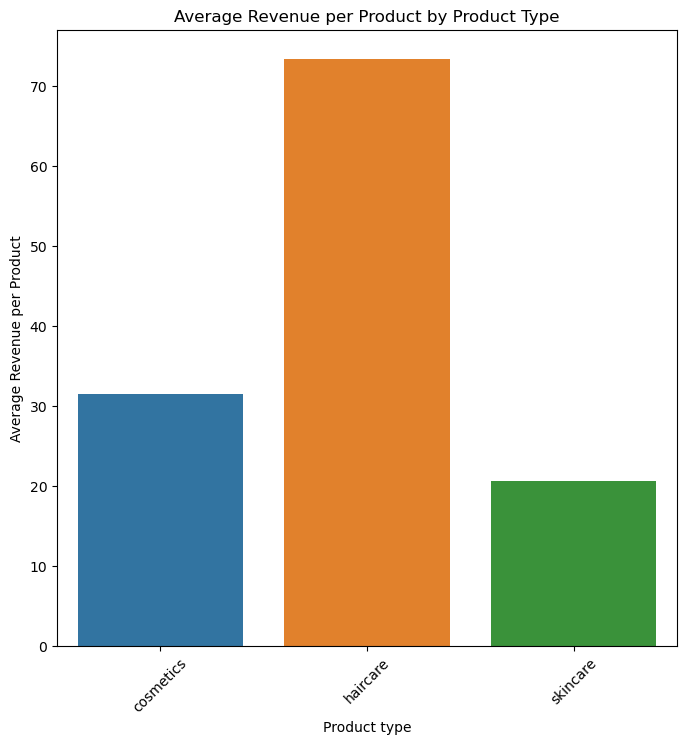

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(x='Product type', y='Revenue per Product', data=average_revenue_per_product)
plt.title('Average Revenue per Product by Product Type')
plt.xticks(rotation=45)
plt.ylabel('Average Revenue per Product')
plt.xlabel('Product type')
plt.show()

Hair care products are giving high revenue per product to the supply chain

# Stock to sales Analysis

In [37]:
sdata['Stock to Sales Ratio'] = sdata['Stock levels'] / (sdata['Number of products sold'] + 1) 

In [38]:
sdata['Stock to Sales Ratio']

0     0.072229
1     0.071913
2     0.111111
3     0.273810
4     0.005734
        ...   
95    0.022288
96    0.206154
97    0.730159
98    0.057987
99    0.087580
Name: Stock to Sales Ratio, Length: 100, dtype: float64

In [39]:
print(sdata['Stock to Sales Ratio'].describe())

count    100.000000
mean       0.213486
std        0.407501
min        0.000000
25%        0.048639
50%        0.114214
75%        0.218005
max        3.720000
Name: Stock to Sales Ratio, dtype: float64


In [40]:
stock_sales_by_product = sdata.groupby('Product type')['Stock to Sales Ratio'].mean().reset_index()
print(stock_sales_by_product)

  Product type  Stock to Sales Ratio
0    cosmetics              0.209391
1     haircare              0.317773
2     skincare              0.127503


High Stock to Sales Ratio: Overstocking

Products with a high ratio might indicate overstocking or low sales.

Low Stock to Sales Ratio: High Sales Efficiency

Products with a low ratio might indicate efficient inventory management

Skincare with low stock to sales ratio shows high efficiency in sales whereas haircare needs to be monitored as stock to sales ratio is slightly high

# Lead Time Analysis

In [41]:
sdata['Lead Time Category'] = pd.cut(sdata['Lead times'], bins=[0, 5, 10, 20], labels=['Short', 'Medium', 'Long'])

In [42]:
sdata['Lead Time Category']

0     Medium
1        NaN
2     Medium
3       Long
4      Short
       ...  
95      Long
96     Short
97      Long
98     Short
99    Medium
Name: Lead Time Category, Length: 100, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [43]:
sdata['Lead Time Category'].value_counts()

Lead Time Category
Long      35
Short     16
Medium    15
Name: count, dtype: int64

In [44]:
avg_lead_time_by_product = sdata.groupby('Product type')['Lead times'].mean().reset_index()
print(avg_lead_time_by_product)

  Product type  Lead times
0    cosmetics   15.384615
1     haircare   15.529412
2     skincare   16.700000


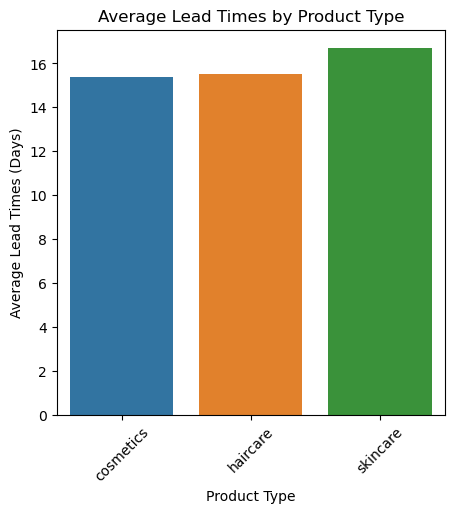

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(x='Product type', y='Lead times', data=avg_lead_time_by_product)
plt.title('Average Lead Times by Product Type')
plt.xticks(rotation=45)
plt.ylabel('Average Lead Times (Days)')
plt.xlabel('Product Type')
plt.show()

Lead time is slightly high for skin care products

# Multivariate Analysis

C:\Users\megha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


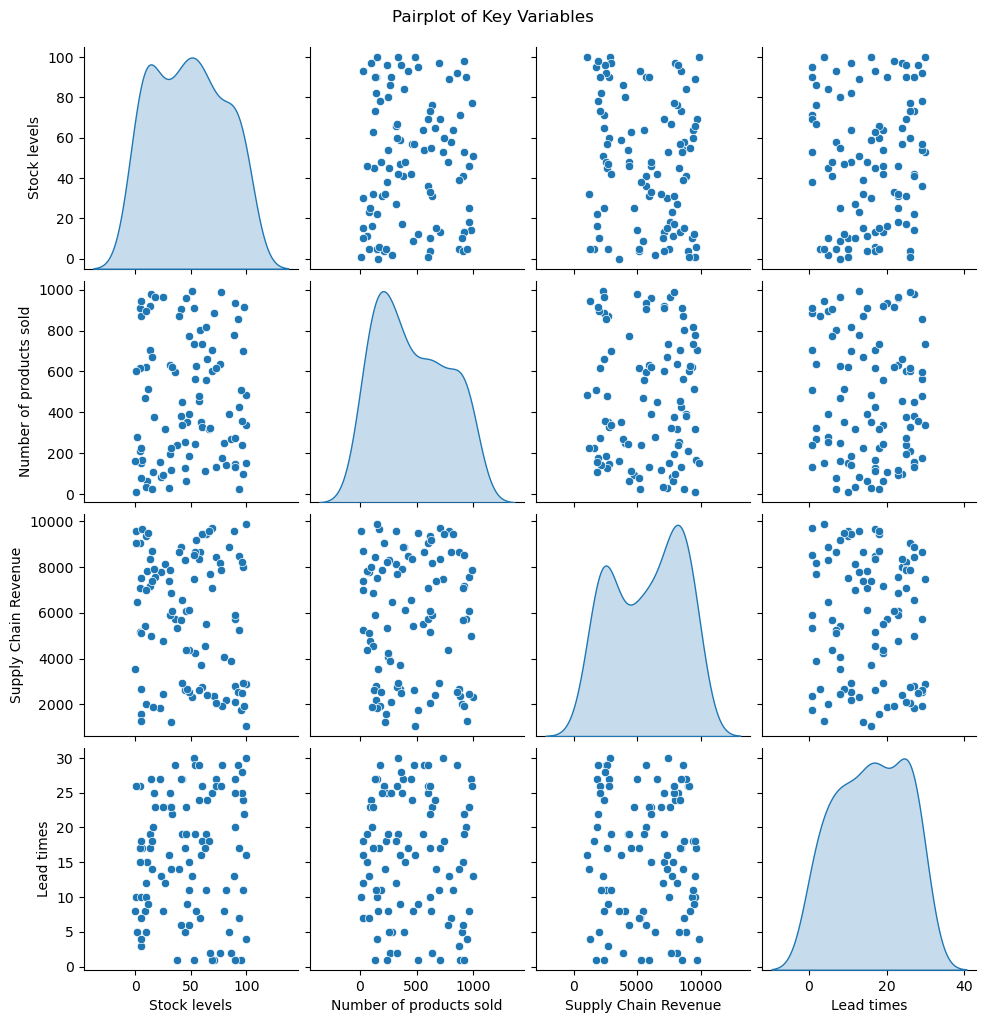

In [46]:
sns.pairplot(sdata[['Stock levels', 'Number of products sold', 'Supply Chain Revenue', 'Lead times']], diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

# Correlation Analysis

In [47]:
numerical_df = sdata.select_dtypes(include=['number'])

In [48]:
numerical_df

,Price,Availability,Number of products sold,Supply Chain Revenue,Stock levels,Lead times,Order quantities,Shipping times,Product_Revenue,Revenue per Product,Stock to Sales Ratio
0,69.808006,55,802,8661.996792,58,7,96,4,55986.020445,10.800495,0.072229
1,14.843523,95,736,7460.900065,53,30,37,2,10924.833130,10.137092,0.071913
2,11.319683,34,8,9577.749626,1,10,88,2,90.557466,1197.218703,0.111111
3,61.163343,68,83,7766.836426,23,13,59,6,5076.557470,93.576342,0.273810
4,4.805496,26,871,2686.505152,5,3,56,8,4185.587048,3.084392,0.005734
...,...,...,...,...,...,...,...,...,...,...,...
95,77.903927,65,672,7386.363944,15,14,26,9,52351.439091,10.991613,0.022288
96,24.423131,29,324,7698.424766,67,2,32,3,7913.094580,23.760570,0.206154
97,3.526111,56,62,4370.916580,46,19,4,9,218.618898,70.498655,0.730159
98,19.754605,43,913,8525.952560,53,1,27,7,18035.954243,9.338393,0.057987


In [49]:
correlation_matrix = numerical_df.corr()

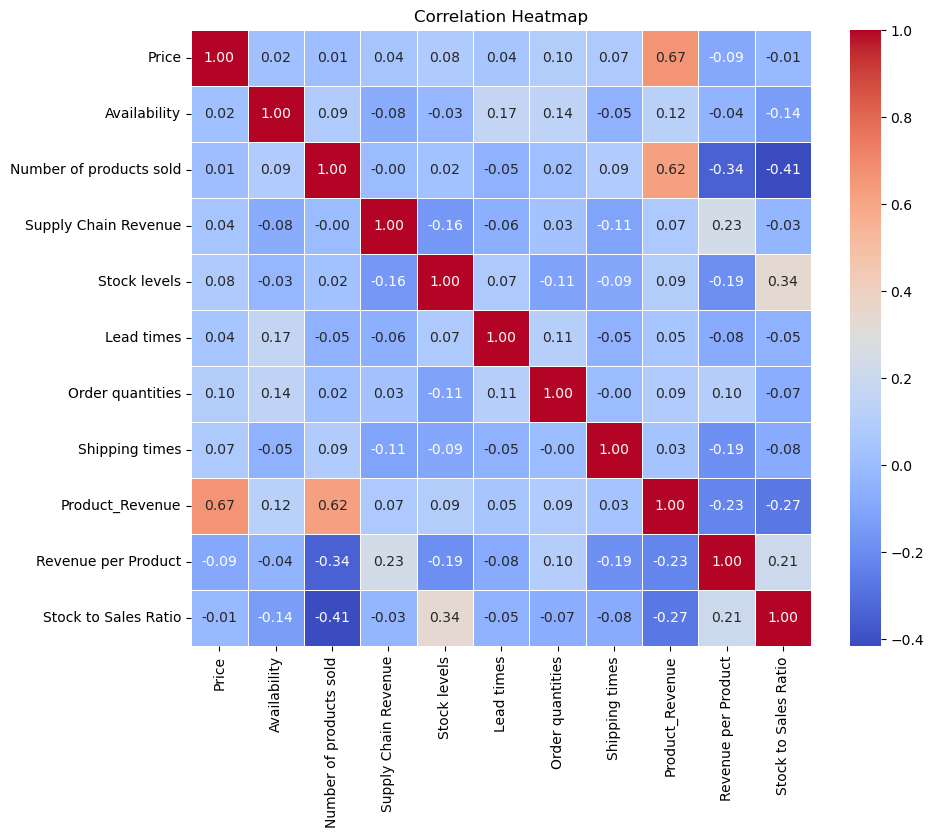

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Highly correlated pairs are Price-Product revenue
Product revenue-No.of products sold

# Regression Analysis

# Simple Linear Regression- Predicting Revenue Generated using Stock Levels

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
X = sdata[['Stock levels']]
y = sdata['Product_Revenue']

In [53]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [54]:
y_pred = model.predict(X)

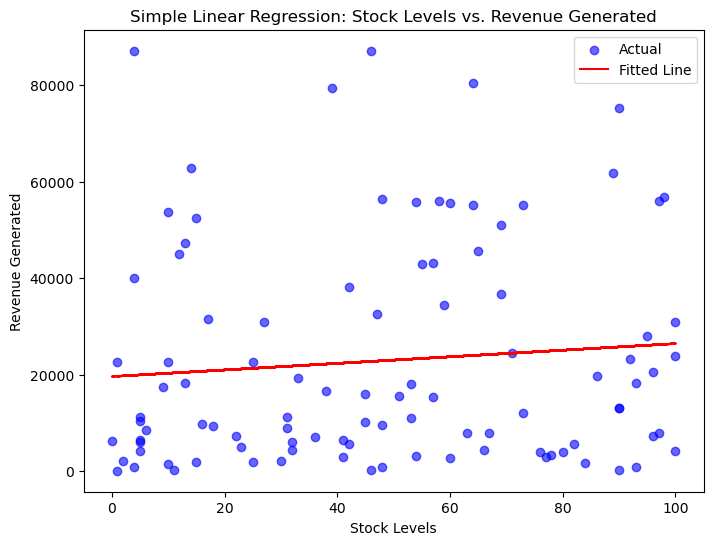

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Simple Linear Regression: Stock Levels vs. Revenue Generated')
plt.xlabel('Stock Levels')
plt.ylabel('Revenue Generated')
plt.legend()
plt.show()

In [56]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 19597.528015955373
Coefficient: 68.20120642295609


# Multiple Linear Regression-Predicting Revenue Generated using Stock Levels, Lead Times, and Products Sold

In [57]:
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
X1 = sdata[['Stock levels', 'Lead times', 'Number of products sold']]
y1 = sdata['Product_Revenue']

In [59]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [61]:
y1_pred = model.predict(X1_test)
print(f"R-squared: {r2_score(y1_test, y1_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred)}")

R-squared: 0.3721392420176378
Mean Squared Error: 274462823.8789387


In [62]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {list(zip(X1.columns, model.coef_))}")

Intercept: -4251.412713435213
Coefficients: [('Stock levels', 73.26968705459421), ('Lead times', 134.05289013817162), ('Number of products sold', 47.45317903162751)]


# Logistic Regression:Predicting whether lead time will exceed 5 days based on various supply chain factors

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Create a binary target variable:
1: Lead times greater than 5 days.
0: Lead times 5 days or less.

In [64]:
sdata['High Lead Time'] = sdata['Lead times'].apply(lambda x: 1 if x > 5 else 0)

In [65]:
X3 = sdata[['Stock levels', 'Number of products sold', 'Order quantities']]
y3 = sdata['High Lead Time']

In [66]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [67]:
log_model = LogisticRegression()
log_model.fit(X3_train, y3_train)

LogisticRegression()

In [68]:
y3_pred = log_model.predict(X3_test)

In [69]:
accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [70]:
print(f"Intercept: {log_model.intercept_}")
print(f"Coefficients: {list(zip(X3.columns, log_model.coef_))}")

Intercept: [2.66751928]
Coefficients: [('Stock levels', array([-0.01614555, -0.00041343,  0.00036634]))]


In [71]:
conf_matrix = confusion_matrix(y3_test, y3_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  3]
 [ 0 17]]


# T-Test [Mean Comparisions]

# Comparing Revenue by Transportation Modes (Two-Sample T-Test)

Hypothesis:

Null Hypothesis (H₀): There is no significant difference in revenue between two transportation modes (e.g., Road vs. Air).

Alternative Hypothesis (H₁): There is a significant difference in revenue between the two modes.

In [72]:
from scipy.stats import ttest_ind

In [73]:
road_revenue = sdata[sdata['Transportation modes'] == 'Road']['Supply Chain Revenue']
air_revenue = sdata[sdata['Transportation modes'] == 'Air']['Supply Chain Revenue']

In [74]:
t_stat, p_value = ttest_ind(road_revenue, air_revenue)

In [75]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.6449935158001208
P-value: 0.5217137084068248


In [76]:
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference exists between the two transportation modes.")
else:
    print("Fail to reject the null hypothesis: No significant difference exists.")

Fail to reject the null hypothesis: No significant difference exists.


# ANOVA[Comparing mean across different product categories]

Hypothesis:

Null Hypothesis (H₀): All product types have the same mean revenue.

Alternative Hypothesis (H₁): At least one product type has a significantly different mean revenue.

In [77]:
from scipy.stats import f_oneway

In [78]:
product_groups = [group['Supply Chain Revenue'].values for name, group in sdata.groupby('Product type')]

In [79]:
f_stat, p_value = f_oneway(*product_groups)

In [80]:
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 1.4801488825172422
P-value: 0.23269838345836072


In [81]:
if p_value < 0.05:
    print("Reject the null hypothesis: At least one product type has significantly different revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue across product types.")

Fail to reject the null hypothesis: No significant difference in revenue across product types.


# Post-Hoc Analysis (Tukey’s Test)
If the ANOVA result is significant, post-hoc analysis (e.g., Tukey’s test) is performed to determine which groups differ.

But Anova is not significant so we stop the test here

# Thank you